In [1]:
# You may add additional imports here
import random
import csv
import matplotlib.pyplot as plt

Question 1
==========

All parts of Question 1 use the _point-a-rally (PARS) scoring_ system.

**Question 1a:** Complete the following function so that it implements the PARS algorithm from the coursework specification.

**[Functionality: 7 marks]**

In [2]:
def game(ra, rb):
    # Probability A wins
    PA = ra/(ra + rb)
    a_score = 0
    b_score = 0

    while not ((a_score >= 11 and (b_score <= a_score - 2 )) or (b_score >= 11 and (a_score <= b_score - 2))):
        r = random.random()
        if (r < PA): 
            # A scores
            a_score += 1
        else: 
            # B scores
            b_score += 1

    return [a_score, b_score]

**Testing:** If the random seed is set to 57, then calling the function with arguments `70` and `30` should return `(11,5)`.

In [3]:
random.seed(57)
print(game(70, 30))

[11, 5]


**Question 1b:** Complete the following function `win_probability_game(ra, rb, simulations)` to simulate `simulations` games in order to estimate the probability that a player with ability `ra` will win a game against a player of ability `rb`.

**[Functionality: 4 marks]**

In [4]:
def win_probability_game(ra, rb, simulations):
    a_wins = 0
    b_wins = 0

    for i in range(simulations):
        result = game(ra, rb)
        if (result[0] > result[1]):
            a_wins += 1
        else:
            b_wins += 1

    return a_wins / (a_wins + b_wins)
    

**Testing:** Given sufficient simulations, calling the function with abilities `70` and `30` should give the answer `0.98` when printed to 2 decimal places.

In [5]:
# Print win_probability_game(70, 30) to 2 decimal places for a suitable value of n:
print(round(win_probability_game(70, 30, 100000), 2))

0.98


**Question 1c:** Assume players abilities are given in a csv file with the format:
```
player a ability, player b ability,
60, 20,
100, 55,
50, 40,
20, 70,
95, 85,
```
Complete the following function to read in a specified csv file of this format and return a `list` of `tuple`s containing each pair of abilities.

**[Functionality: 4 marks]**

In [6]:
def read_abilities(file_name): # HINT: what should the argument be?
    pairs = []
    with open(file_name) as csvfile:
        reader = csv.reader(csvfile)

        # Skip the first line (the header)
        rows = iter(reader)
        next(rows)

        for row in rows:
            pairs.append((int(row[0]), int(row[1])))

    return pairs

**Testing:** Calling the function to read the file `test.csv` from Learning Central should return `[(60, 20), (100, 55), (50, 40), (20, 70), (95, 85)]`

In [7]:
# Print the result of calling the function for the file `test.csv`
read_abilities("test.csv")

[(60, 20), (100, 55), (50, 40), (20, 70), (95, 85)]

**Question 1d:** Write a function that takes a `list` of the format returned by your answer to 1c as an argument, and uses `matplotlib` to produce a plot (with labelled axes) showing the probability that player a beats player b (in a game) against `ra / r_b` for each pair.

**[Functionality: 5 marks]**

In [8]:
def plot_win_probabilities(skill_levels, simulations): # HINT: what should the argument be?
    a_b_ratio = []
    a_probability = []

    for i in range(len(skill_levels)):
        p = skill_levels[i]
        a_b_ratio.append(p[0] / p[1])
        a_probability.append((win_probability_game(p[0], p[1], simulations)))

    plt.xlabel("ra / rb")
    plt.ylabel("Probability a wins")
    plt.plot(a_b_ratio, a_probability, 'ro')


    return a_probability

**Testing:** The following figure (or similar) should result from the data `[(60, 20), (100, 55), (50, 40), (20, 70), (95, 85)]'

<img src="./win_probabilities.png" alt="Win probabilities" width="500">


[0.991, 0.922, 0.699, 0.002, 0.617]

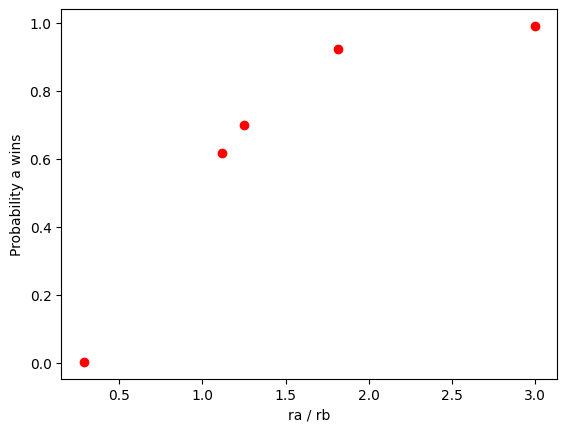

In [9]:
# Call the function to plot the figure here
plot_win_probabilities(read_abilities("test.csv"), 1000)

**Question 1e:** Complete the following function `win_probability_match(ra, rb, simulations, m)` to simulate `simulations` matches which are won by the first player to win `m` games, and returns an estimate of the probability that a player with ability `ra` will win such a match against a player of ability `rb`.

Provide code that works out the smallest value of `m` such that `win_probability_match(60, 40, simulations, m)` is at least `0.9`. 

_HINT: make sure you use an appropriate value for `simulations`._

**[Functionality: 5 marks]**

In [10]:
def win_probability_match(ra, rb, simulations, m):
    # How many matches either a or b have won
    a_match_wins = 0
    b_match_wins = 0
    
    # How many time a or b won a simulation
    a_sim_wins = 0
    b_sim_wins = 0

    for i in range(simulations):
        while (a_match_wins < m ) and (b_match_wins < m):
            p = game(ra, rb)
            if (p[0] > p[1]):
                a_match_wins += 1
            else:
                b_match_wins += 1
        
        if (a_match_wins > b_match_wins):
            a_sim_wins += 1
        else:
            b_sim_wins += 1

        # Reset a and b match wins
        a_match_wins = 0
        b_match_wins = 0

    return a_sim_wins / (a_sim_wins + b_sim_wins)
    

# Calculate lowest value of m here
win_probability_match(60, 40, 10000, 2)

0.9311

Question 2
==========

Complete the remaining template of a scientific report that uses the results of simulation (with suitable input data) to investigate whether English or PARS is the ``better'' scoring method for squash matches. 

You should clearly state any assumptions you make, and may add any number of code cells. Guidance for completing the markdown/text cells is given in the coursework specification. The word count of the remaining markdown/text cells must be at most 750.

Your investigation should consider the relative ability of the two players (i.e. `ra/rb`) as the _independent variable_ and include appropriate figures that show how your choice of relevant _dependent variable_ varies. Your results **must** cover at least 50 different values of `ra/rb`.

Some starting points you may consider:
- How _fair_ is the scoring method - does the better player usually win?
- Shorter matches are usually preferable (e.g. for television) - if you assume each rally in a match takes equal time, how long do matches typically last?
- What effect does the relative ability of the two players have?

**[Report: 7 marks; Achievement: 8 marks]**

## Problem

words 

## Method

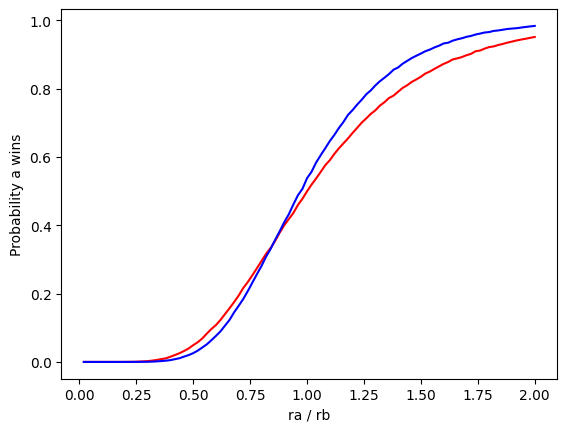

In [17]:
# English Scoring Function

def english_rally(p_server, r):
    # Return whether the server won the rally
    win_rally = False

    if (r < p_server):
        win_rally = True
    else:
        win_rally = False

    return win_rally

def check_score_is_eight(score, player):
    if (score == 8):
        return player
    else:
        return None

def get_new_win_score(server, player_to_eight_first, pa):
    pb = 1 - pa
    pass

def english_game(ra, rb, server = "a"):
    pa = ra / (ra + rb)

    win_score = 9
    a_score = 0
    b_score = 0
    # Stores the most recent player to get to a score of eight
    got_to_eight = None

    while (a_score < win_score) and (b_score < win_score):
        r = random.random()

        if (server == "a"):
            if (english_rally(pa, r)):
                #print("a1:", a_score)
                a_score += 1
                #print("a2:", a_score)
                got_to_eight = check_score_is_eight(a_score, "a")
            else:
                server = "b"
        else:
            if (english_rally(1 - pa, r)):
                b_score += 1
                got_to_eight = check_score_is_eight(b_score, "b")
            else:
                server = "a"

        if (a_score == 8 and b_score == 8):
            # As got_to_eight stores the most recent player
            # the other player must be the one who got to eight first
            if (got_to_eight == "b"):
                got_to_eight = "a"
            else:
                got_to_eight = "b"

            # Decide whether to play to 9 or 10
            win_score = 10 #get_new_win_score(server, got_to_eight, pa)

    return [a_score, b_score]

def win_probability_english_game(ra, rb, simulations):
    a_wins = 0
    b_wins = 0

    for i in range(simulations):
        result = english_game(ra, rb)
        if (result[0] > result[1]):
            a_wins += 1
        else:
            b_wins += 1

    return a_wins / (a_wins + b_wins)

def plot_win_probabilities_both(skill_levels, simulations): # HINT: what should the argument be?
    a_b_ratio = []
    a_probability = []
    a_b_ratio_english = []
    a_probability_english = []

    for i in range(len(skill_levels)):
        p = skill_levels[i]
        a_b_ratio.append(p[0] / p[1])
        a_probability.append((win_probability_game(p[0], p[1], simulations)))
    
    for i in range(len(skill_levels)):
        p = skill_levels[i]
        a_b_ratio_english.append(p[0] / p[1])
        a_probability_english.append((win_probability_english_game(p[0], p[1], simulations)))

    
    plt.xlabel("ra / rb")
    plt.ylabel("Probability a wins")
    plt.plot(a_b_ratio, a_probability, color="red")
    plt.plot(a_b_ratio_english, a_probability_english, color="blue")

    return a_probability

def create_data_set(amount = 100):
    data = []
    for i in range(amount):
        data.append((i + 1,50))

    return data

d = create_data_set()

p = plot_win_probabilities_both(d, 100000)




## Assumptions

## Results

## Conclusions